In [25]:
import pandas as pd

In [26]:
df=pd.read_excel('/content/glass.xlsx', sheet_name='glass')

In [27]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [29]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [30]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

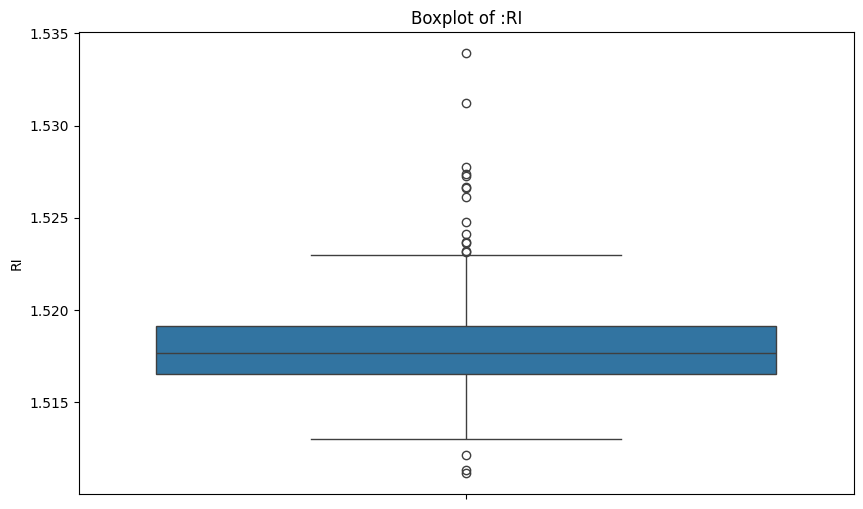

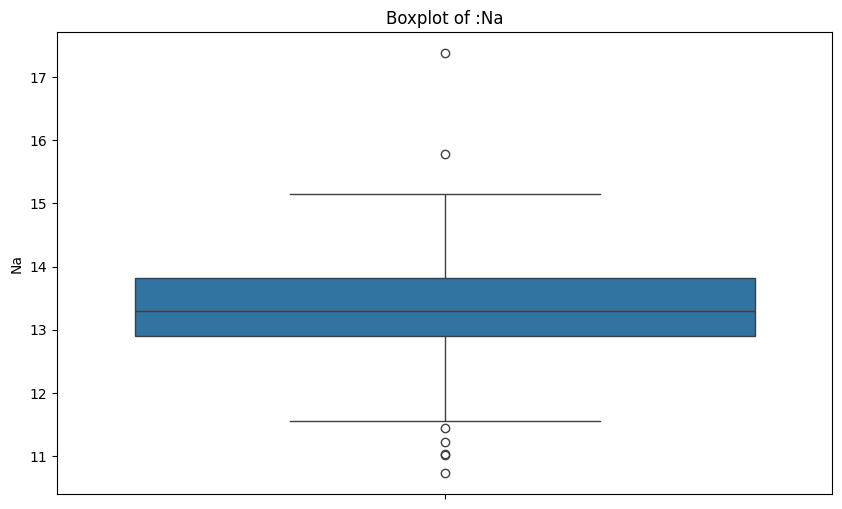

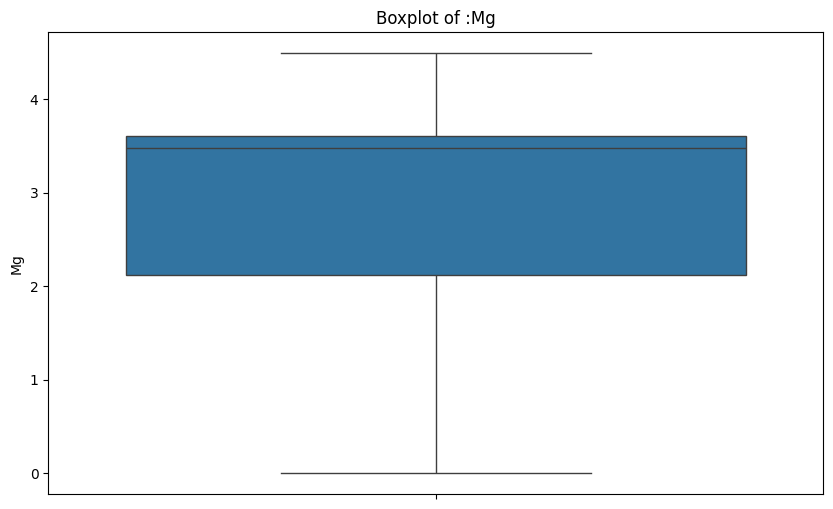

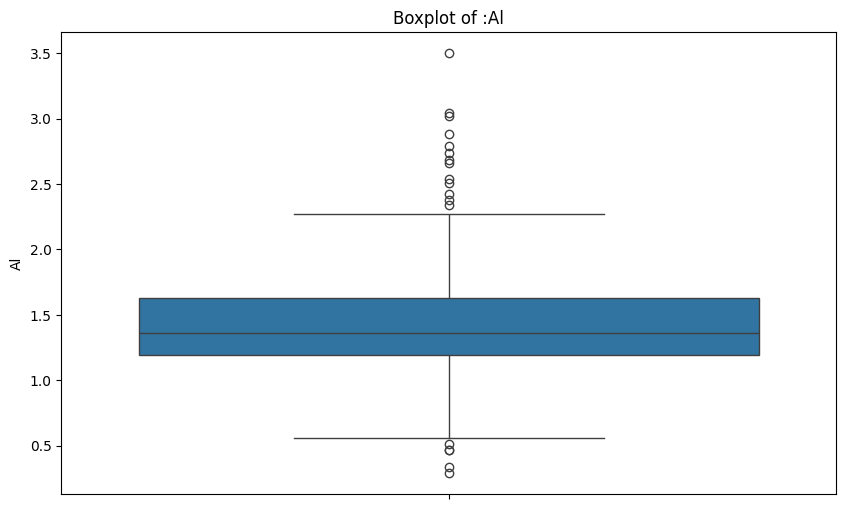

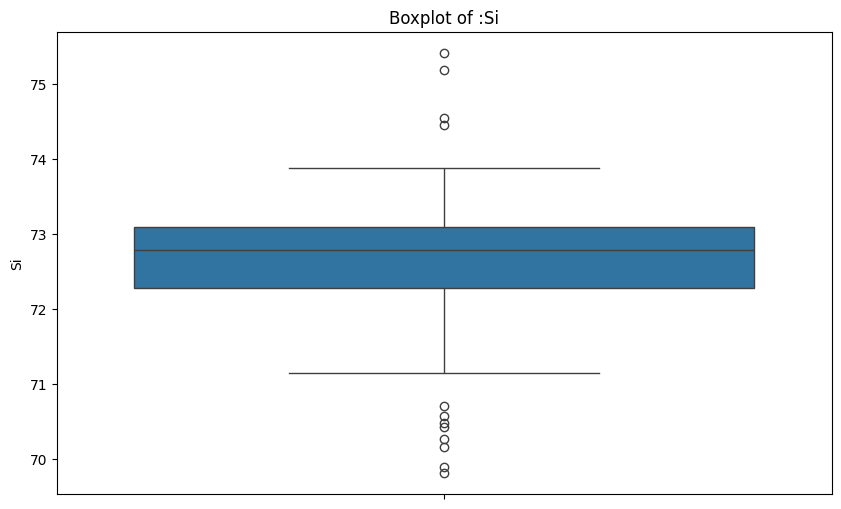

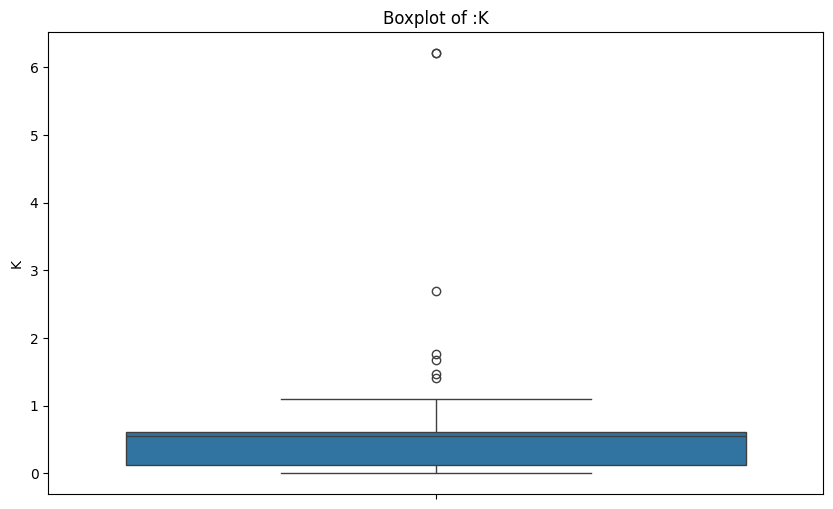

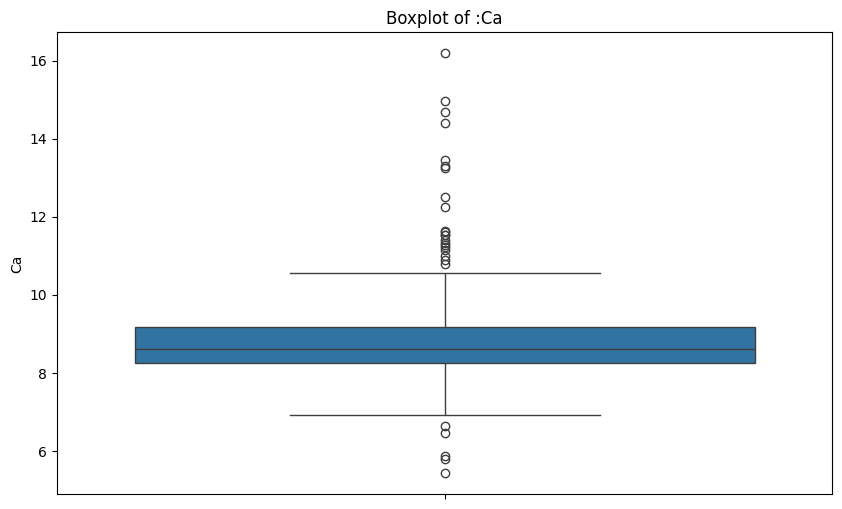

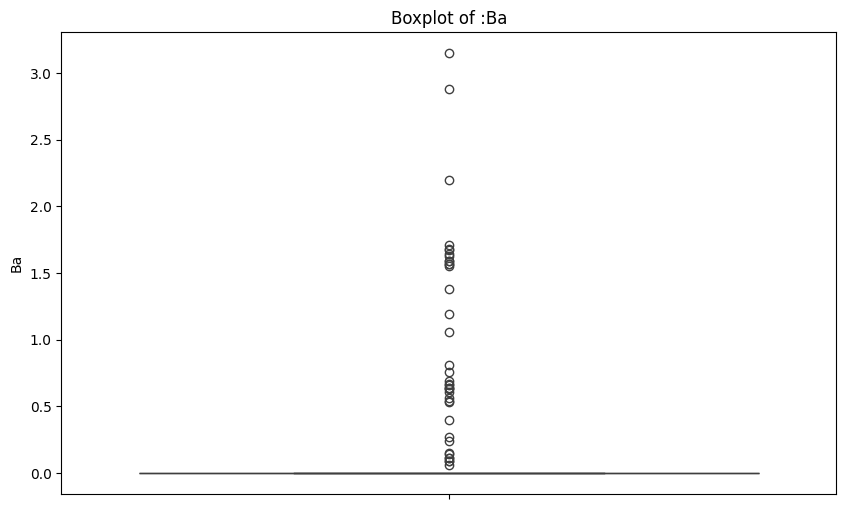

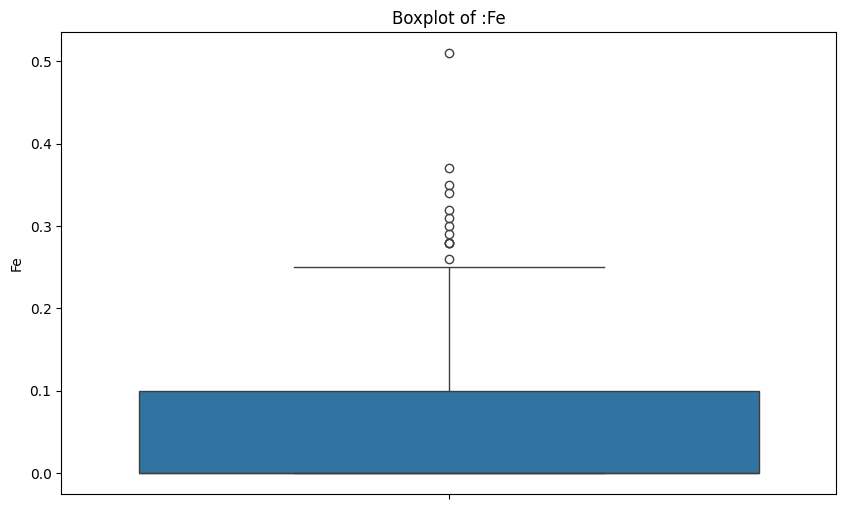

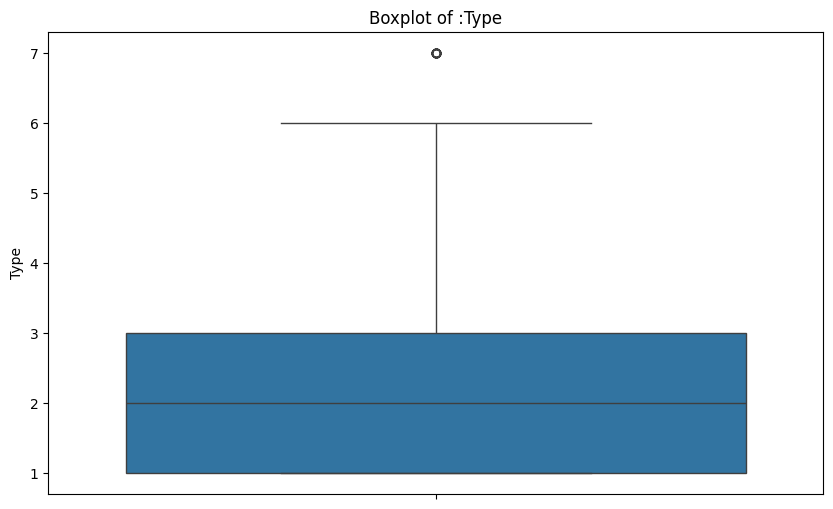

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title("Boxplot of :" +col)
  plt.show()

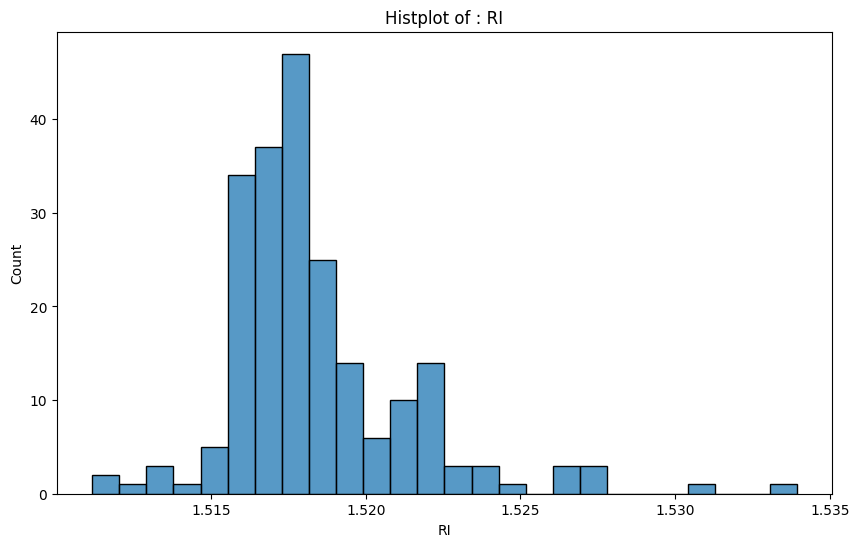

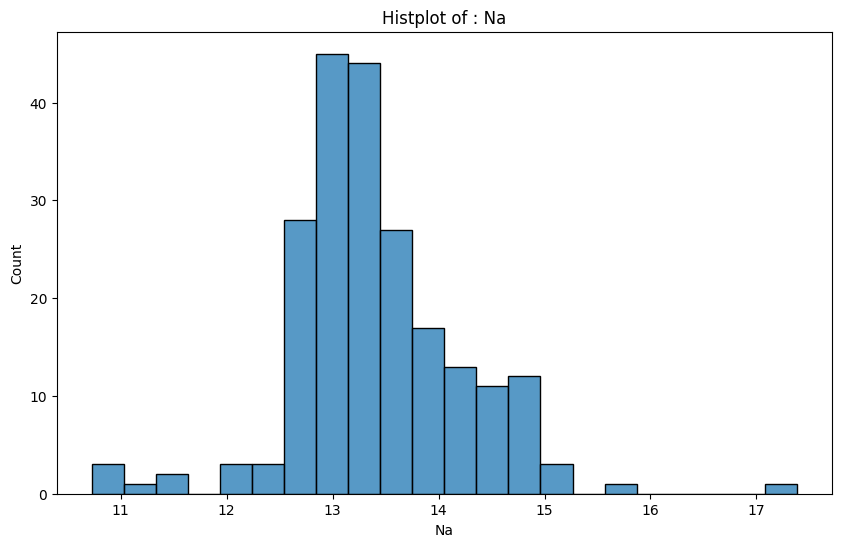

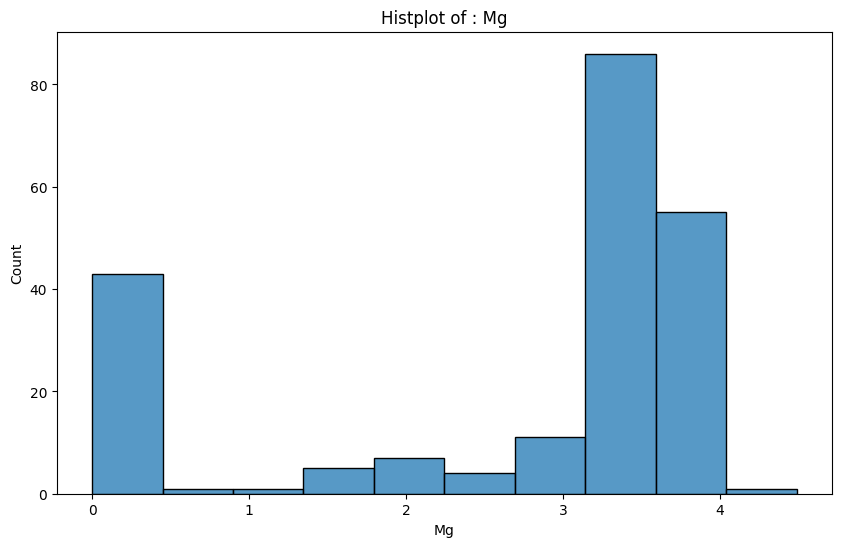

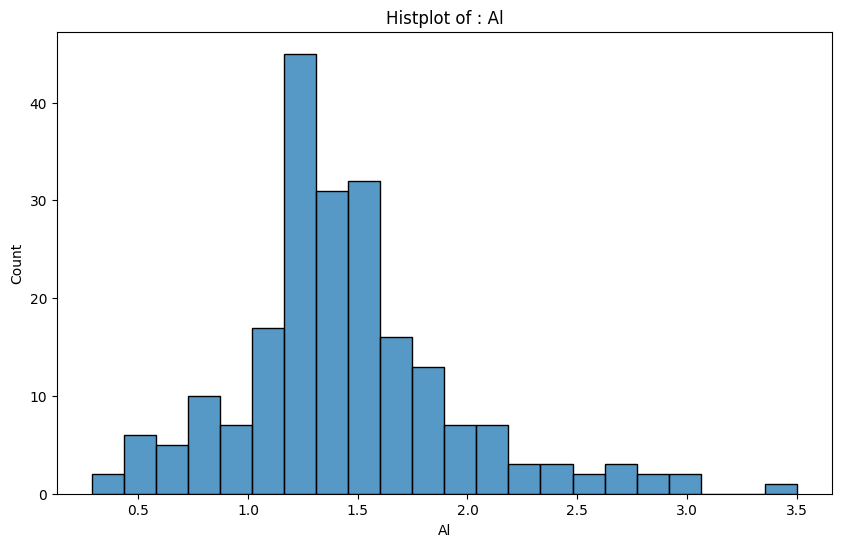

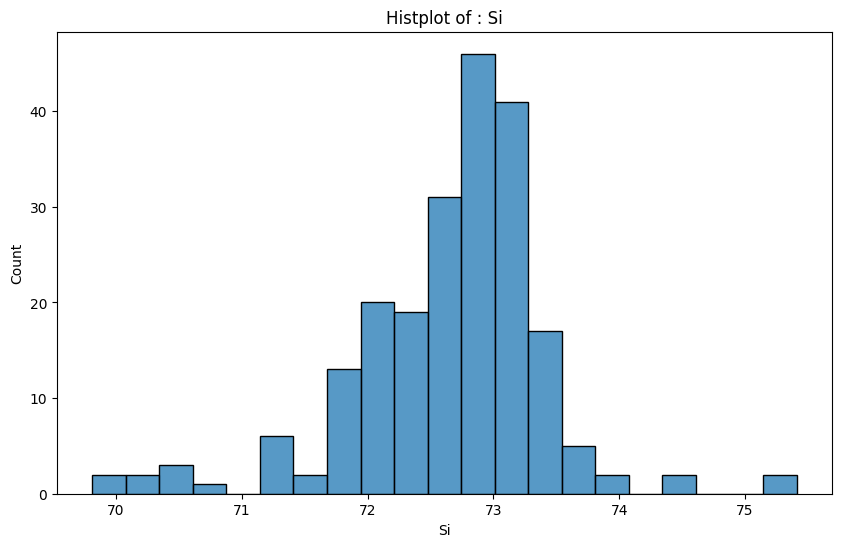

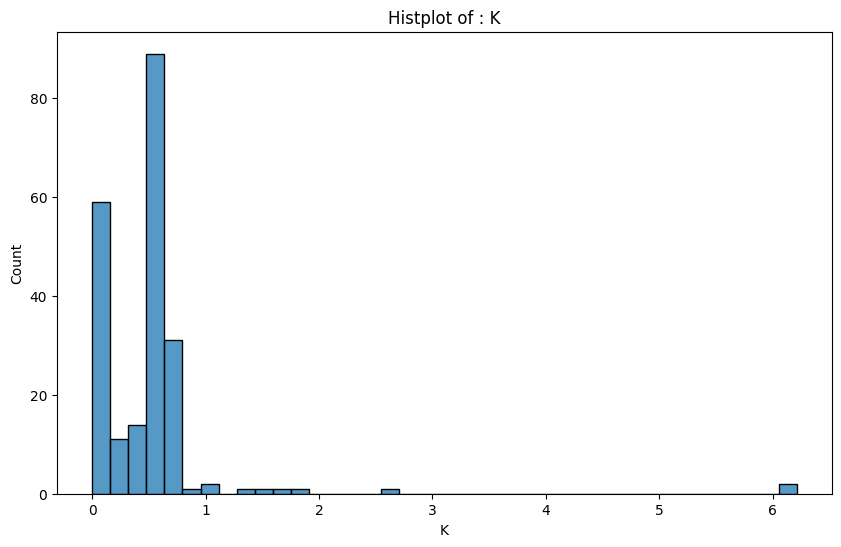

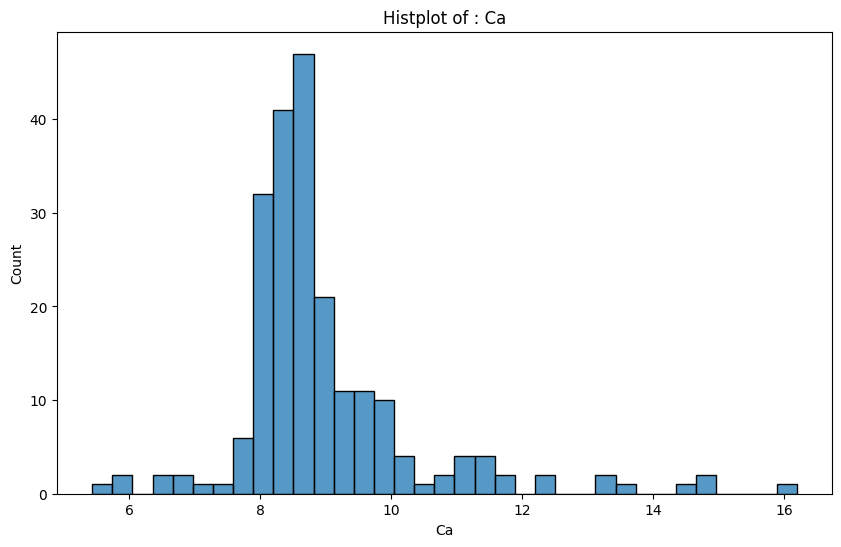

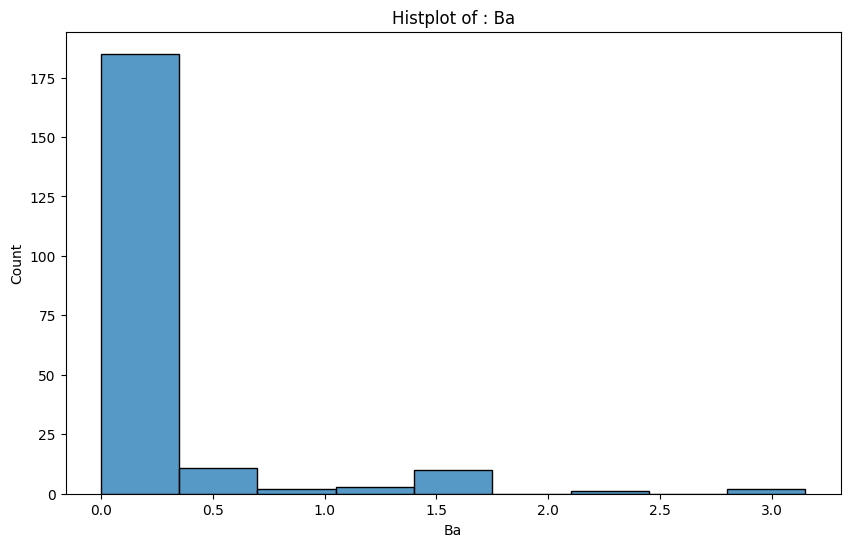

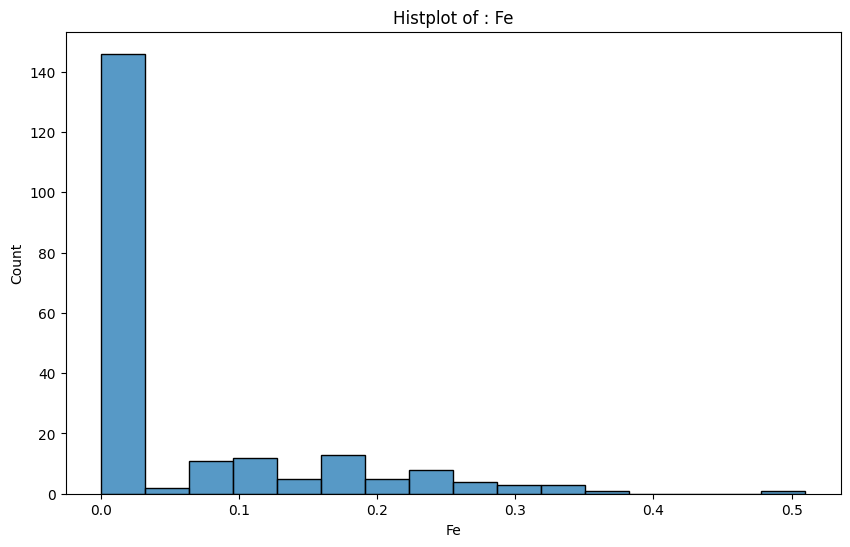

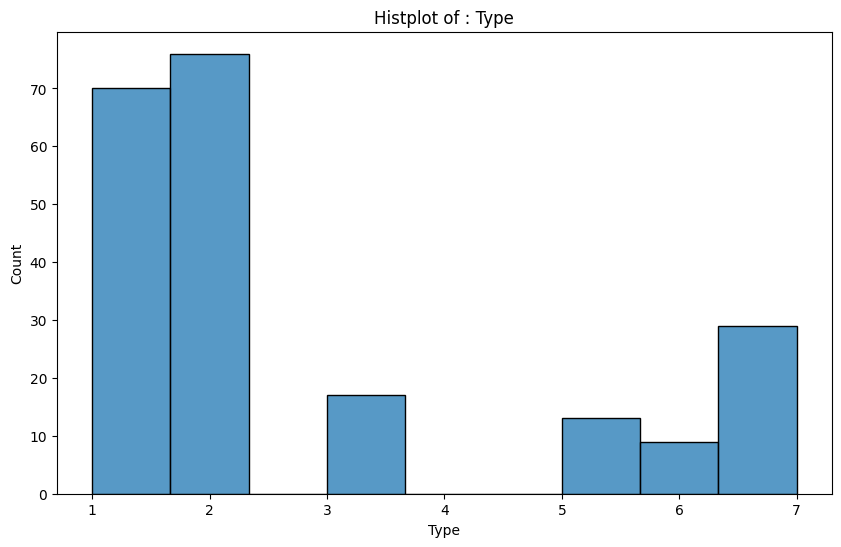

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col])
  plt.title("Histplot of : " + col)
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

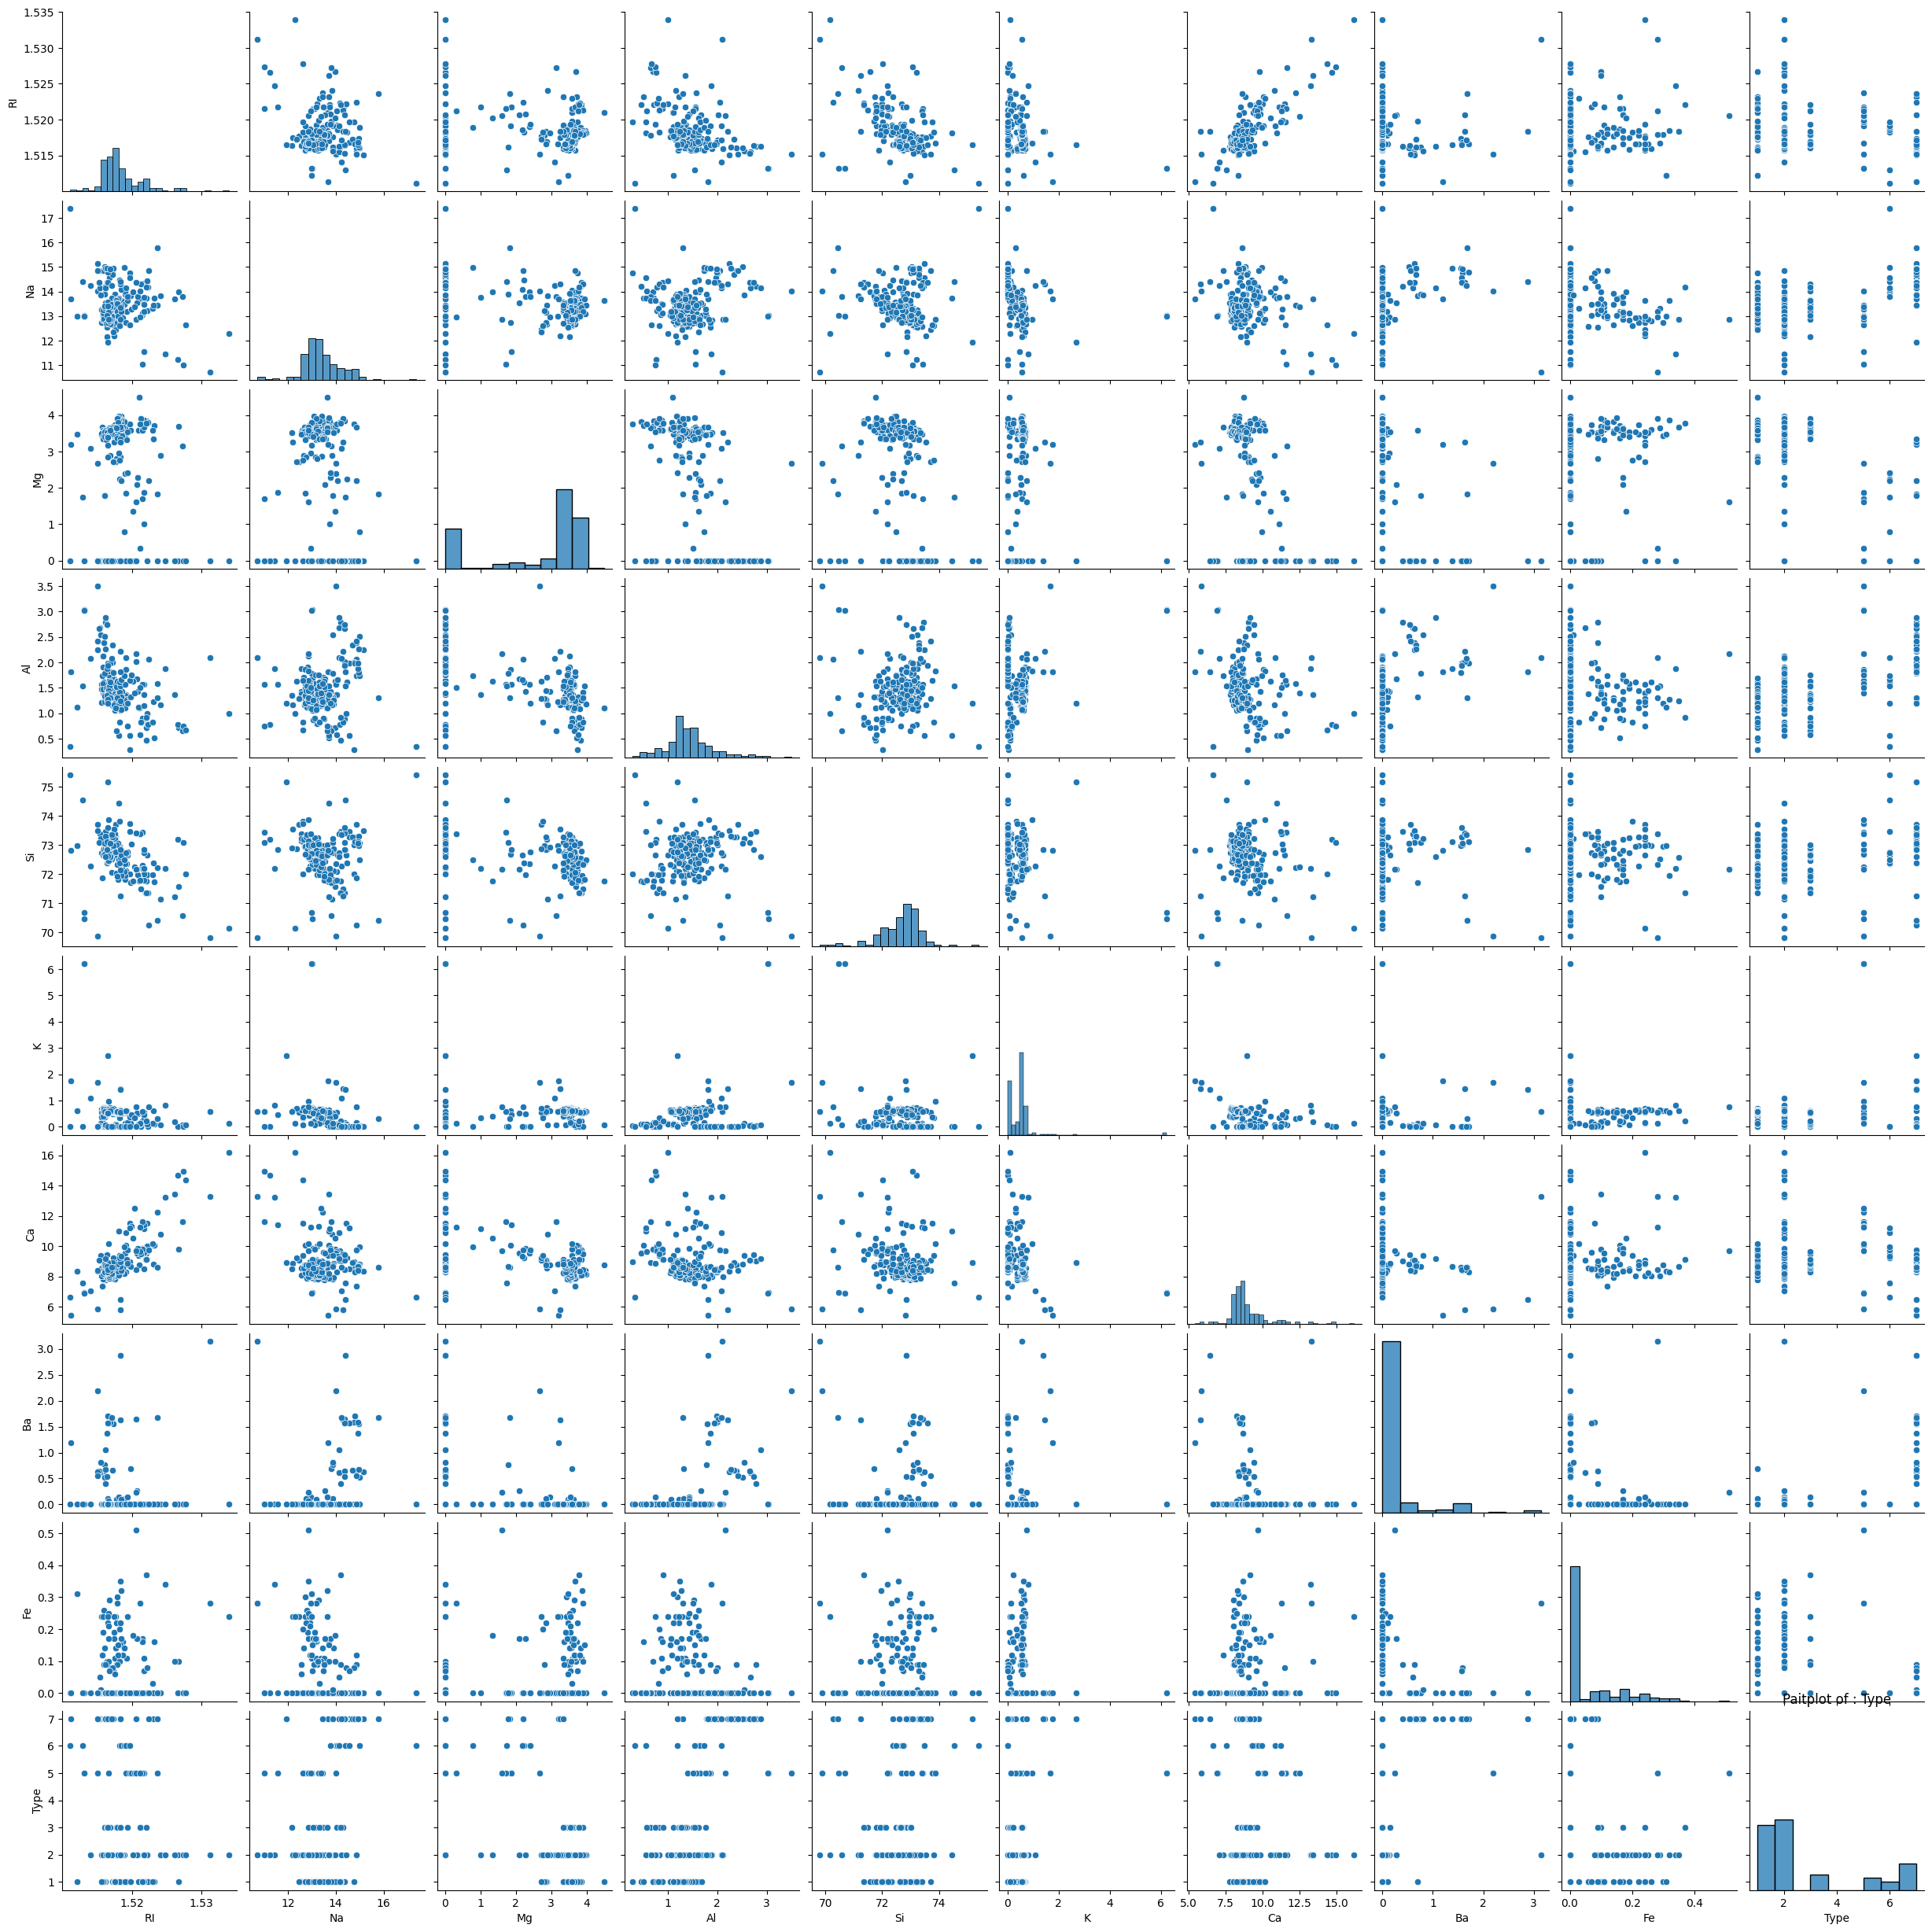

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.title("Paitplot of : " + col)
plt.show

As there is no categorical variables we are skipping encoding part

Scaling using standard  Scaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)
print(scaled_df)

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1   -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2   -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3   -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4   -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
..        ...       ...       ...       ...       ...       ...       ...   
209 -0.704815  0.898681 -1.865511  2.881125 -0.052974 -0.640968  0.157088   
210 -0.500178  1.856097 -1.865511  1.094342  0.529374 -0.763919 -0.392276   
211  0.754046  1.168721 -1.865511  1.154570  0.995252 -0.763919 -0.364103   
212 -0.612399  1.193270 -1.865511  0.993960  1.241133 -0.763919 -0.335931   
213 -0.414363  1.009152 -1.865511  1.275028  0.917606 -0.763919 -0.237327   

           Ba        Fe      Type  
0   -0.352877 -0.586451 -0.848275  
1  

In [35]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.01)
iso.fit(scaled_df)
predictions=iso.predict(scaled_df)
mask = predictions != -1
clean_data_df = scaled_df[mask]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Using Isolation forest to find and remove outliers

In [36]:
print(clean_data_df.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe      Type  
0 -0.352877 -0.586451 -0.848275  
1 -0.352877 -0.586451 -0.848275  
2 -0.352877 -0.586451 -0.848275  
3 -0.352877 -0.586451 -0.848275  
4 -0.352877 -0.586451 -0.848275  


In [37]:
scaled_df.shape

(214, 10)

In [38]:
clean_data_df.shape

(211, 10)

Log Transformation

In [39]:
import numpy as np
features=['Ba','K']
for col in features:
  clean_data_df[col]=np.log(clean_data_df[col]+1)
print(clean_data_df.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -1.113844 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026563 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.179764 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.106256 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.078228 -0.624699   

         Ba        Fe      Type  
0 -0.435219 -0.586451 -0.848275  
1 -0.435219 -0.586451 -0.848275  
2 -0.435219 -0.586451 -0.848275  
3 -0.435219 -0.586451 -0.848275  
4 -0.435219 -0.586451 -0.848275  


<ipython-input-39-5b6e94cc1dd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_df[col]=np.log(clean_data_df[col]+1)


Here i applied log transformation beacuse i find some skewness in Ba and K .

In [42]:
from sklearn.model_selection import train_test_split
X=clean_data_df.drop('Type',axis=1)
y=clean_data_df['Type']
# Correct the unpacking of train_test_split results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(168, 9)
(168,)
(43, 9)
(43,)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
rf=RandomForestClassifier()
if y_train.dtype != 'object':

    y_train = y_train.astype('category').cat.codes
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
if y_test.dtype != 'object':
    y_test = y_test.astype('category').cat.codes

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))

Accuracy: 0.7906976744186046
Precision: 0.8450996677740864


We changed y_test type to category because when i try to run it , it is showing as type 'continuous' so we changed both y_test and y_train using codes .

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

Random Forest Accuracy: 0.7906976744186046
Gradient Boosting Accuracy: 0.7674418604651163
